In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Load data

In [9]:
data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#Data Preprocessing

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [14]:
data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [16]:
data.duplicated().sum()

0

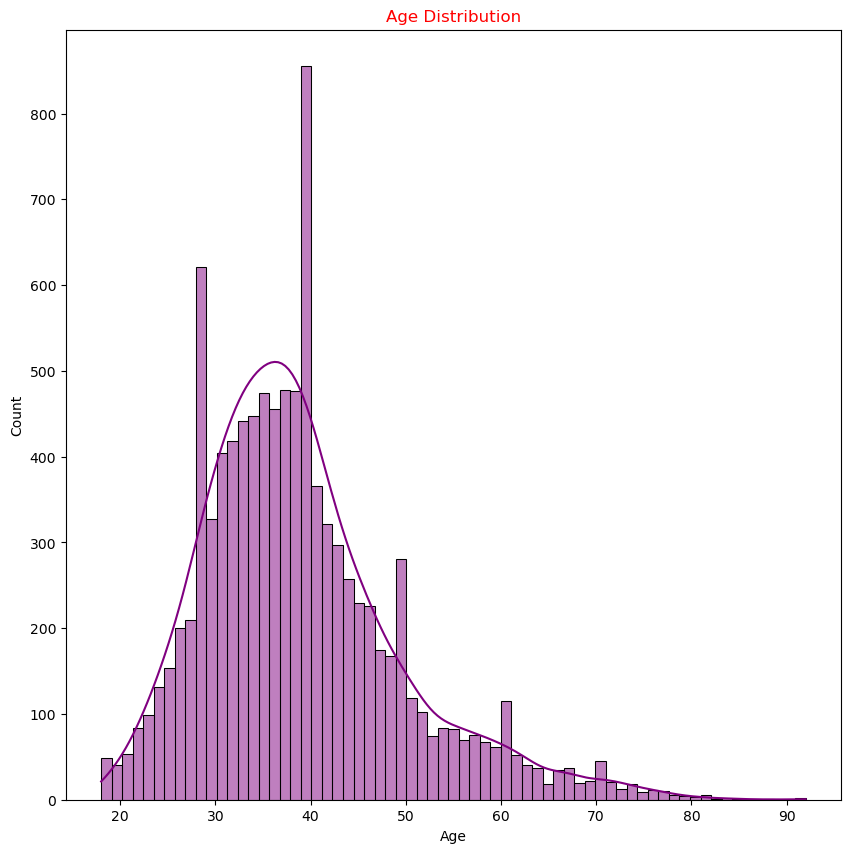

In [18]:
plt.figure(figsize=(10,10))
sns.histplot(data=data,x='Age',kde=True, color='purple')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution', color='red')
plt.show()

C:\Users\monis\AppData\Local\Temp\ipykernel_5824\2586650925.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=active_counts.index, y=active_counts.values, palette = 'muted')


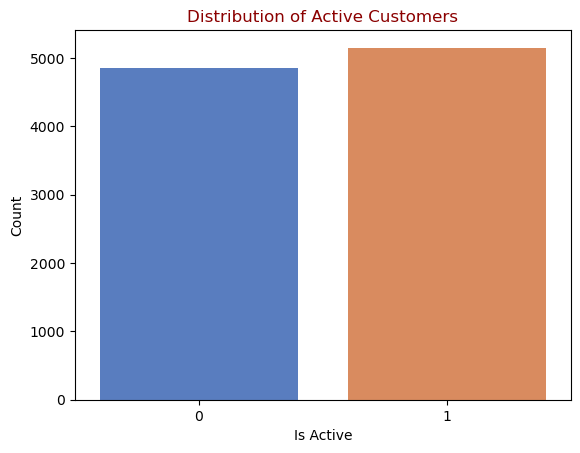

In [20]:
active_counts = data['IsActiveMember'].value_counts()
sns.barplot(x=active_counts.index, y=active_counts.values, palette = 'muted')
plt.title('Distribution of Active Customers',color='darkred')
plt.xlabel('Is Active')
plt.ylabel('Count')
plt.show()

In [22]:
data['Gender'] = data['Gender'].map({'Female': 1, 'Male': 0})

In [24]:
new_geo=LabelEncoder()
data["new_geo"]=new_geo.fit_transform(data['Geography'])
data.drop('Geography',axis=1,inplace=True)

In [26]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,new_geo
0,619,1,42,2,0.00,1,1,1,101348.88,1,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,2
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,2


#Train model

In [29]:
data['Balance_Salary_Ratio'] = data['Balance'] / data['EstimatedSalary']
data.drop(['Balance', 'EstimatedSalary'], axis=1, inplace=True)

In [31]:
X=data.drop('Exited',axis=1)
y=data['Exited']
X

,CreditScore,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,new_geo,Balance_Salary_Ratio
0,619,1,42,2,1,1,1,0,0.000000
1,608,1,41,1,1,0,1,2,0.744677
2,502,1,42,8,3,1,0,0,1.401375
3,699,1,39,1,2,0,0,0,0.000000
4,850,1,43,2,1,1,1,2,1.587055
...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,2,1,0,0,0.000000
9996,516,0,35,10,1,1,1,0,0.564108
9997,709,1,36,7,1,0,1,0,0.000000
9998,772,0,42,3,2,1,0,1,0.808230


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
log_reg_preds = log_reg.predict(X_test)

In [39]:
# Random Forest
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
rfc_preds = rfc.predict(X_test)

In [40]:
# XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

#Evaluate model

In [44]:
models = {'Logistic Regression': log_reg_preds, 'Random Forest': rfc_preds, 'XGBoost': xgb_preds}

for name, preds in models.items():
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))

--- Logistic Regression ---
Accuracy: 0.816
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.89      1607
           1       0.62      0.16      0.26       393

    accuracy                           0.82      2000
   macro avg       0.72      0.57      0.58      2000
weighted avg       0.79      0.82      0.77      2000

Confusion Matrix:
 [[1568   39]
 [ 329   64]]
--- Random Forest ---
Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.45      0.56       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

Confusion Matrix:
 [[1542   65]
 [ 215  178]]
--- XGBoost ---
Accuracy: 0.859
Classification Report:
               precision    recall  f1-score   support

           0  

In [46]:
# Convert X_test back to a DataFrame
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Add predictions and true labels to the DataFrame
X_test_df['Logistic Regression'] = log_reg_preds
X_test_df['Random Forest'] = rfc_preds
X_test_df['XGBoost'] = xgb_preds
X_test_df['True Label'] = y_test.values  # Add true labels for hue

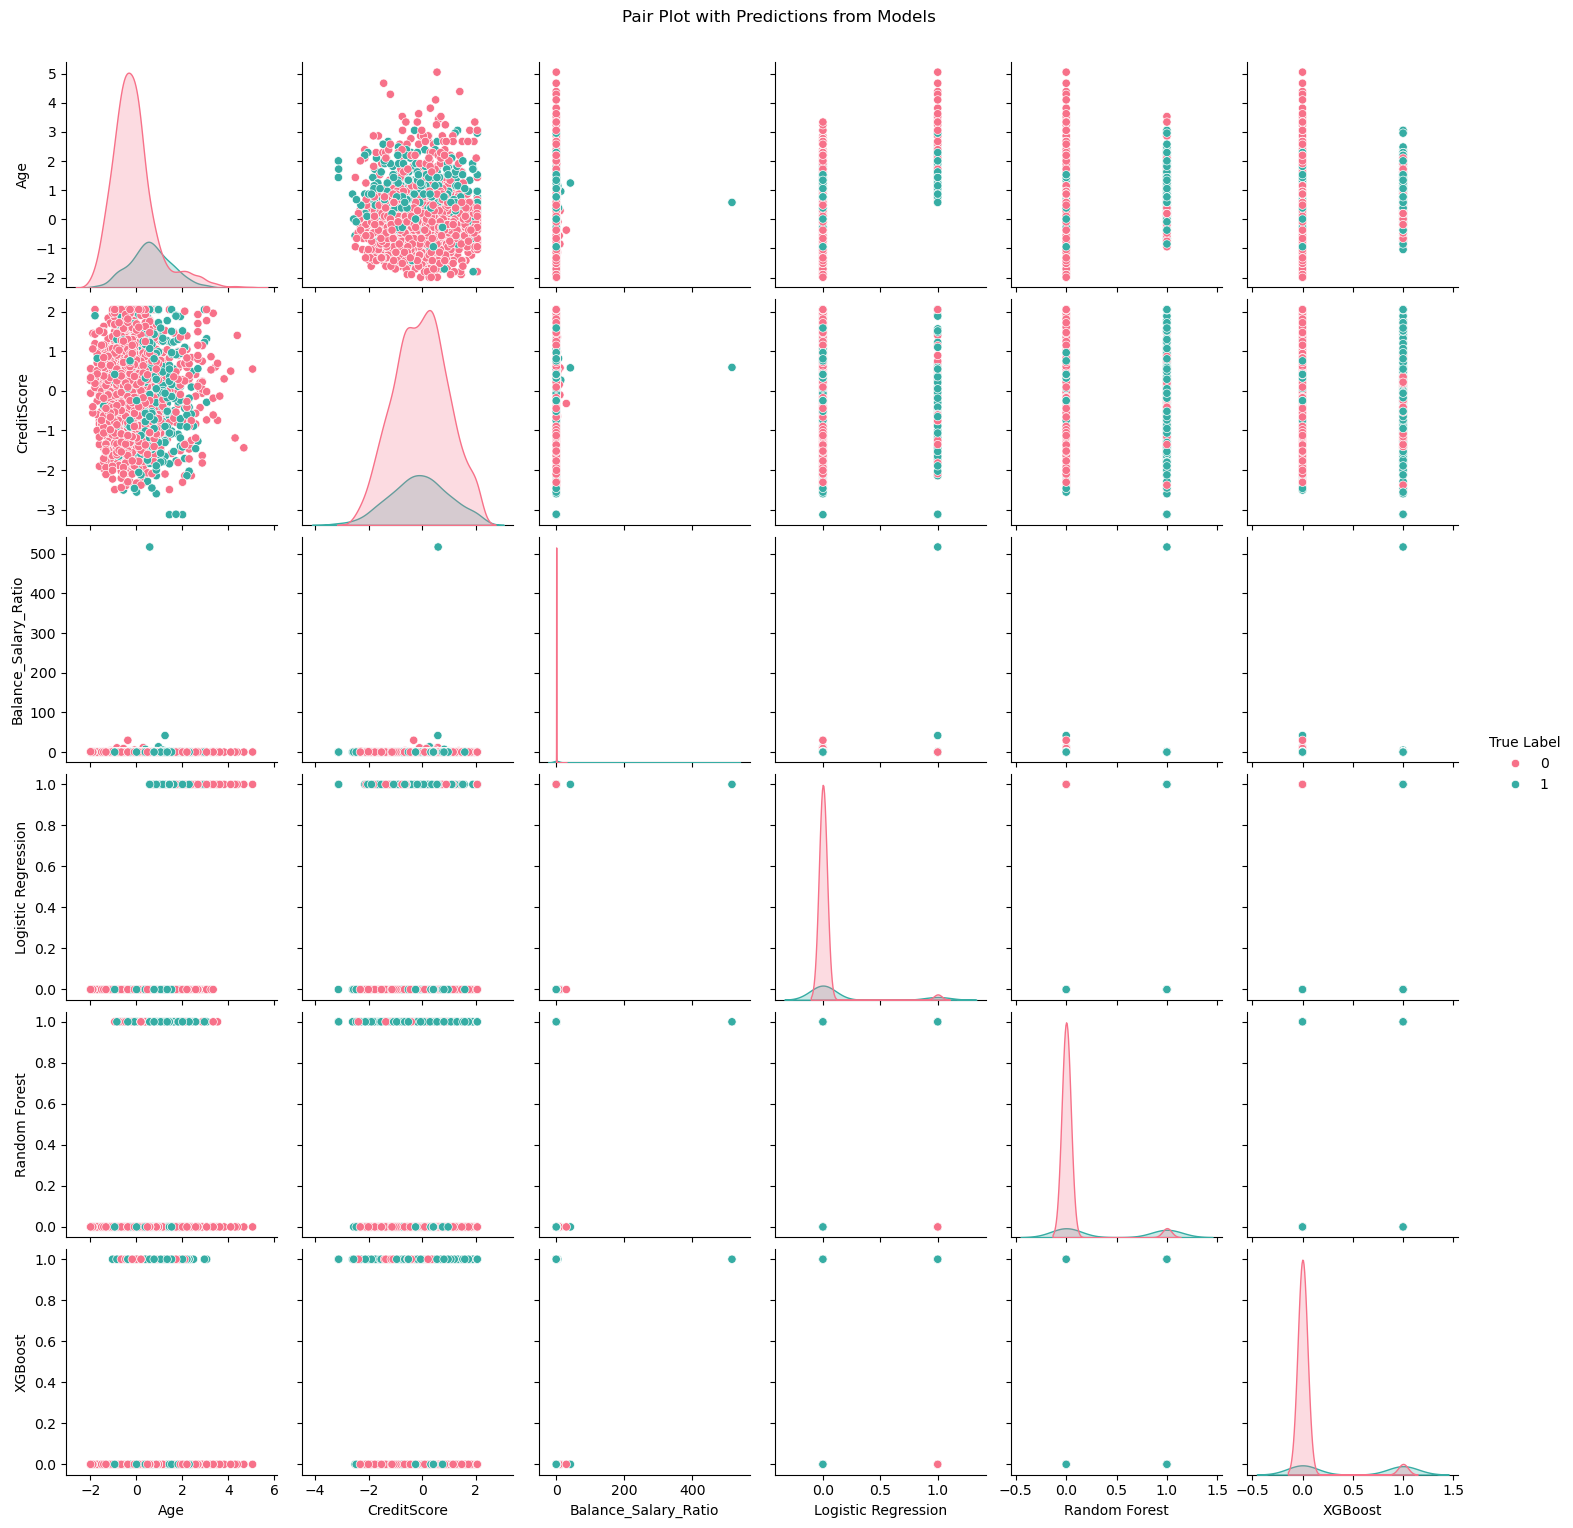

In [48]:
# Select features and model predictions for visualization
selected_columns = ['Age', 'CreditScore', 'Balance_Salary_Ratio', 'Logistic Regression', 'Random Forest', 'XGBoost', 'True Label']

# Pair plot 
sns.pairplot(X_test_df[selected_columns], hue='True Label', diag_kind='kde', palette='husl')
plt.suptitle("Pair Plot with Predictions from Models", y=1.02)
plt.show()
